<a href="https://colab.research.google.com/github/hongseoi/colab/blob/main/easyOCR01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 잘되는 영수증 이미지 찾기
+ 이미지 데이터를 찾기
+ Threshold 조절
+ 숫자를 인식
### 2. 잘 안되는 영수증 이미지를 전처리해서 잘 인식하게 개선
+ Data augmentation
    * 글자 진함이 다른 경우
    * 구겨진 경우
    * 기울어진 경우
    * 화질이 나쁜 경우
+ 영수증의 종류
    * 표준 전자영수증
### 3. 다른 모델로 바꿔서 적용
### 4-1. 그 모델의 논문을 읽고 모델 선정 이유를 조사
### 4-2. 영어로 학습된 모델을 한글로 학습해서 적용

In [2]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 45.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
root = '/content/drive/MyDrive/공모전/text-ocr/receipts/'

In [41]:
import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np

In [35]:
reader = easyocr.Reader(['ko', 'en'])

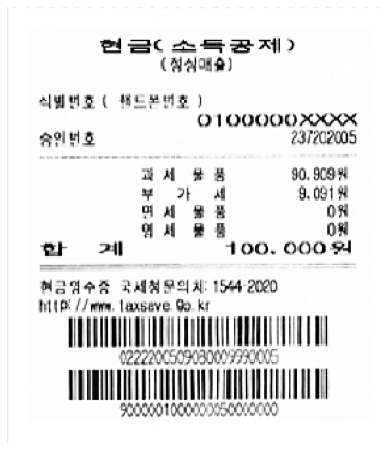

In [29]:
img = plt.imread(root + 'receipt01.jpg')
plt.figure(figsize=(8, 8))
img[:, :, ::-1]
plt.imshow(img)
plt.axis('off')
plt.show()

In [77]:
result = reader.readtext(root+'/receipt03.jpg', detail=0) #detail=0: 인식된 텍스트만 출력
result

['5',
 '농협',
 '주소 :김기 의정부시',
 '대표',
 '전화 :031-+++-++++',
 '{품하볼염:hztsgar',
 '-*++*+',
 '데이',
 ';장X: 교랜',
 'nonghyun',
 'com/',
 '입수 3 미지',
 '교망',
 '가 ( 30입내 )',
 '구야정에 서',
 '감감스',
 '2015-]1-03 16:31 :53',
 '00D2-00055',
 '상촌 (코드 )',
 '단가',
 '수량',
 '0O1',
 '조모님우유',
 '9D0n',
 '[2. 150]',
 '*8831104210645',
 '350',
 ',330',
 '002',
 '임파',
 '4231973',
 '3,300',
 '3,300',
 '003',
 "1'다",
 '*231913',
 '500',
 '500',
 '004',
 '꼬임',
 '*231308',
 '750',
 '750',
 '0U5',
 '하선정',
 '바로먹기 온장아씨',
 '1ED3',
 '5801007255839',
 ',3B0',
 '380',
 '006',
 '로커리',
 '*232285',
 '230',
 '280',
 '만 매',
 '580',
 '찬',
 '올 금',
 '560',
 '560',
 '> )-',
 'IBD',
 '부가세품세m물가역=',
 '255',
 '125',
 '바코드앞',
 '면세',
 '임세',
 '상품명',
 'P모입트',
 '회원 :2010190334+*+',
 '박구난',
 '우수고각 모인트',
 '잔 여',
 '인 트',
 '1드3',
 '사용가 능포인트',
 'J5J',
 '+>4 + + ++V',
 '신용카드 매#전표 (고객8 )',
 '4+4++주4++',
 '++4+++++++++++',
 '우리카드',
 '4902+*',
 ':OD개',
 '얘소금액',
 '550원',
 '승인No:75513401',
 '카을천 ;034030V39C',
 ':0000007493C',
 '승인입자 :20151103',
 '은 하루',
 '되

5
농협
주소 :김기 의정부시
대표
전화 :031-+++-++++
{품하볼염:hztsgar
-*++*+
데이
;장X: 교랜
nonghyun
com/
입수 3 미지
교망
가 ( 30입내 )
구야정에 서
감감스
2015-]1-03 16:31 :53
00D2-00055
상촌 (코드 )
단가
수량
0O1
조모님우유
9D0n
[2. 150]
*8831104210645
350
,330
002
임파
4231973
3,300
3,300
003
1'다
*231913
500
500
004
꼬임
*231308
750
750
0U5
하선정
바로먹기 온장아씨
1ED3
5801007255839
,3B0
380
006
로커리
*232285
230
280
만 매
580
찬
올 금
560
560
> )-
IBD
부가세품세m물가역=
255
125
바코드앞
면세
임세
상품명
P모입트
회원 :2010190334+*+
박구난
우수고각 모인트
잔 여
인 트
1드3
사용가 능포인트
J5J
+>4 + + ++V
신용카드 매#전표 (고객8 )
4+4++주4++
++4+++++++++++
우리카드
4902+*
:OD개
얘소금액
550원
승인No:75513401
카을천 ;034030V39C
:0000007493C
승인입자 :20151103
은 하루
되체요
언장난 ,
'{고경프 {5 위해0 3승하0 달하경숨님당
{슬물(제카드지장 )


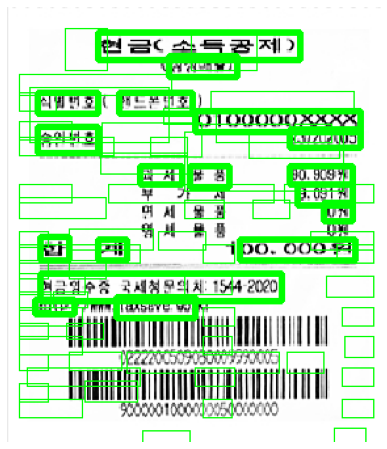

In [76]:
THRESHOLD = 0.001

for bbox, text, conf in result:
  if conf > THRESHOLD:
    print(text)
    c1, c2 = (int(bbox[0][0]), int(bbox[0][1])), (int(bbox[2][0]), int(bbox[2][1]))
    cv2.rectangle(img, c1, c2, (0,255,0), 1)
plt.figure(figsize=(8, 8))
plt.imshow(img[:, :, ::-1])
plt.axis('off')
plt.show()

In [64]:
def read(img_path):
    img = cv2.imread(img_path)

    result = reader.readtext(img_path)

    r = []

    for bbox, text, conf in result:
        if conf > THRESHOLD:
          print(text)
          c1, c2 = (int(bbox[0][0]), int(bbox[0][1])), (int(bbox[2][0]), int(bbox[2][1]))
          cv2.rectangle(img, c1, c2, (0,255,0), 1)
    print(r)
    plt.figure(figsize=(8, 8))
    plt.imshow(img[:, :, ::-1])
    plt.axis('off')
    plt.show()

In [69]:
ls

receipt01.jpg  receipt02.jpg  receipt03.jpg


In [70]:
img_path = root+'/receipt01.jpg'

NameError: ignored

In [49]:
tuple(bbox[0])

(21.292893218813454, 223.29289321881345)